In [1]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
path = "cong_dataset"
ds = pd.DataFrame()
for file_name in os.listdir(path):
    temp = pd.read_excel(path + "//" + file_name, index_col='dateandtime',parse_dates=True)
    ds = ds.append(temp)

    

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_44984\1175650595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_44984\1175650595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_44984\1175650595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_44984\1175650595.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Nourhan.DESKTOP-MSMUPKR\App

In [3]:
ds

,vehid,coord,gpscoord,spdK/m,edge,lane,displacement,turnAngle,vehDen
dateandtime,,,,,,,,,
2023-02-17 07:02:00,carIn1058:1,"[4166.366292569818, 2127.014114998826]","[31.345566809847142, 30.059779282311283]",80.808151,669890458#5,669890458#5_1,3518.68,353.61,165
2023-02-17 07:02:00,carIn2452:1,"[2372.7072902420896, 1446.2400436093787]","[31.32706959171265, 30.05340283669511]",61.832612,894550197#3-AddedOnRampEdge,894550197#3-AddedOnRampEdge_2,1471.57,352.06,165
2023-02-17 07:02:00,carIn3182:3,"[4791.77849666051, 3271.278303159994]","[31.3518814206727, 30.07018289459843]",81.254190,939250970,939250970_0,4057.58,72.72,165
2023-02-17 07:02:00,carIn3222:1,"[2328.1852386854866, 1327.161847155135]","[31.326625988562448, 30.05232279574609]",55.209310,883292350#0-AddedOffRampEdge,883292350#0-AddedOffRampEdge_0,269.91,84.36,165
2023-02-17 07:02:00,carIn3323:1,"[4226.424623074936, 2209.9230183138584]","[31.346177192016665, 30.06053501997396]",69.688148,699691940#10-AddedOffRampEdge,699691940#10-AddedOffRampEdge_0,5244.72,263.58,165
...,...,...,...,...,...,...,...,...,...
2023-02-17 07:01:00,randUni44885:1,"[3257.0536646525834, 3222.834788463976]","[31.33597169893636, 30.06954534181759]",43.226188,-699695781#1,-699695781#1_0,5319.61,348.89,166
2023-02-17 07:01:00,randUni4569:1,"[3506.154361079976, 2424.0708869617247]","[31.338675540644445, 30.062372605420787]",57.366353,671744652#5,671744652#5_0,1780.10,263.20,166
2023-02-17 07:01:00,randUni8375:1,"[4881.663261426991, 2019.3565755700922]","[31.353000677695157, 30.058901271235634]",7.666013,:2349736012_11,:2349736012_11_0,85.20,165.92,166


## LSTM on Every edge with Freq > 90%

In [4]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

In [5]:
temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '10T'  #one reading every 10 mins
                      )]
          ).mean()

In [6]:
temp

edge,-178543139#2,-182371948#0,-182371948#1,-182371948#2,-182371950#1,-182371950#2,-182371955#0,-182371955#1,-182371955#2,-182371956#0,...,:cluster_8574575726_8574575729_8574575735_8574575737_0,:cluster_8574575726_8574575729_8574575735_8574575737_2,:cluster_8574575726_8574575729_8574575735_8574575737_4,:cluster_9848177603_9848177608_0,:cluster_9848177603_9848177608_2,:cluster_9848177603_9848177608_5,:cluster_9848177603_9848177608_6,:cluster_9848177603_9848177608_7,:cluster_9848177603_9848177608_8,:cluster_9848177603_9848177608_9
dateandtime,,,,,,,,,,,,,,,,,,,,,
2023-02-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.072676,NaN,NaN,NaN,NaN,NaN
2023-02-17 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,52.836077,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.369143,NaN,NaN
2023-02-17 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-17 00:30:00,NaN,NaN,44.203430,NaN,NaN,NaN,25.804139,59.455311,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-17 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 23:10:00,NaN,NaN,47.745933,NaN,NaN,NaN,NaN,43.534958,45.590241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-17 23:20:00,38.526944,0.000000,42.452667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.967480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-17 23:30:00,43.806384,NaN,NaN,NaN,NaN,16.123568,39.923807,47.863256,NaN,NaN,...,NaN,79.731755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
temp.count().sort_values(ascending=False)

edge
669890462#13      144
819202035         144
858935302         144
700675428         144
700673538         144
                 ... 
:6570524702_0       1
:6570524703_6       1
:9134495896_0       1
:6570524704_11      1
:6580157423_8       1
Length: 6339, dtype: int64

In [342]:
limitPer = len(temp) * .90
df = temp.dropna(thresh=limitPer, axis=1)

In [343]:
df.count().sort_values(ascending=False)

edge
819202035                        144
858935302                        144
669890462#13                     144
700673538                        144
700675428                        144
                                ... 
52244427#7                       130
669890458#18-AddedOffRampEdge    130
906984715#1-AddedOffRampEdge     130
700074885#3                      130
178336809#8                      130
Length: 101, dtype: int64

In [8]:
#fillna with max insteadx

In [344]:
df = df.fillna(temp.mean())

In [345]:
df = df.loc[:, (temp != 0).any(axis=0)]


In [9]:
#Smooth curve

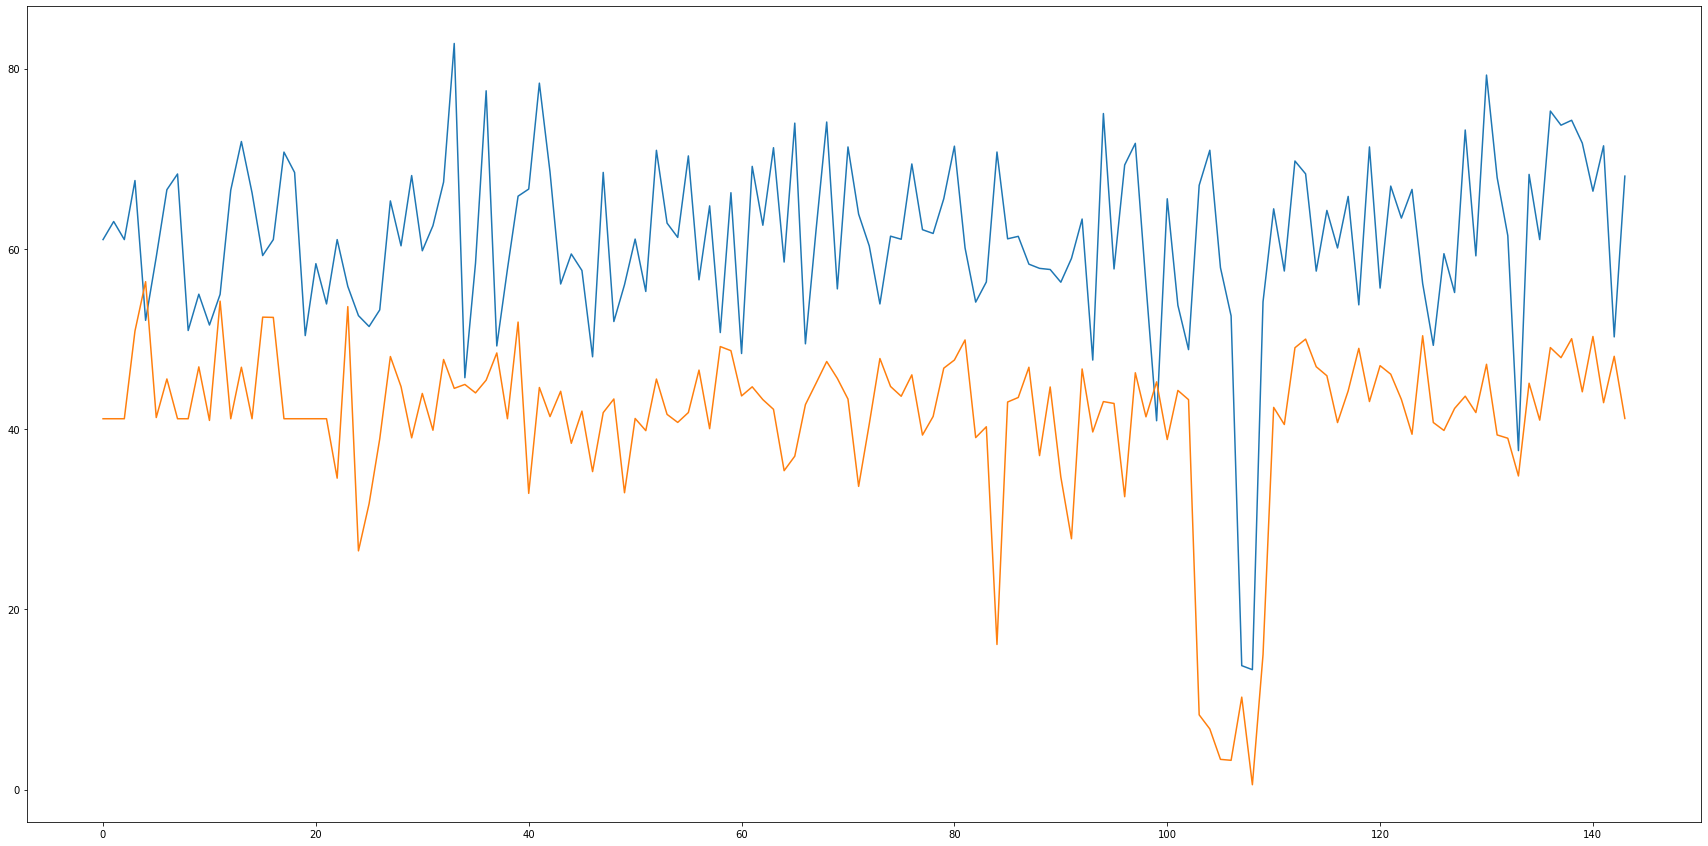

In [347]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(df.values[:,1])
plt.plot(df.values[:,2])
plt.show()

In [348]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_size = int(len(df) * 0.75)
test_size = len(df) - train_size

train  = df[0:train_size]
test   = df[train_size:]

In [349]:
train

edge,178336809#8,25584650#1,25746572#6,26195270#6-AddedOffRampEdge,26203214#1,26203214#1-AddedOnRampEdge,26203214#3,26203214#3-AddedOnRampEdge,26203214#4,26203214#4-AddedOffRampEdge,...,939250966#10-AddedOnRampEdge,939250966#14,939250970,939250971,939250973,939250978#1,940974902#0,940974905#1,958778139#0-AddedOnRampEdge,:8771565283_0
dateandtime,,,,,,,,,,,,,,,,,,,,,
2023-02-17 00:00:00,54.881939,61.022663,41.148877,67.045549,63.505154,51.954056,95.947876,64.080702,78.416258,103.095426,...,107.196389,67.423233,78.934141,81.568960,105.474447,99.464281,87.557450,68.069139,98.634614,6.050986
2023-02-17 00:10:00,79.833869,63.028655,41.148877,72.665821,31.500460,108.706661,88.370932,57.595239,87.696211,62.271858,...,15.351520,69.261233,72.052386,74.575705,88.655967,89.378368,96.931733,94.121713,79.540338,18.461652
2023-02-17 00:20:00,70.575350,61.022663,41.148877,74.362596,75.457782,51.954056,88.370932,82.968742,84.277117,65.784485,...,54.084068,69.261233,73.760192,74.575705,95.582190,89.800809,113.287664,77.809730,82.385663,6.050986
2023-02-17 00:30:00,54.651838,67.573346,50.875564,78.514234,55.790918,67.310339,88.370932,69.623555,71.341301,83.772982,...,96.522176,36.906147,82.375527,74.575705,96.123967,93.746755,100.947453,74.369185,83.204764,9.355550
2023-02-17 00:40:00,74.615391,52.063395,56.353779,72.665821,28.694688,62.818504,70.773760,69.623555,81.094961,97.507731,...,79.109740,69.261233,75.312317,64.694713,83.276061,93.746755,100.066968,83.226391,99.006699,1.990310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17 17:10:00,65.745509,67.044627,8.299951,71.897077,34.138630,35.667289,81.392026,59.456395,83.526429,66.933093,...,40.290793,60.882468,68.700269,72.721030,76.904121,90.106101,67.102966,70.225982,51.174471,6.528085
2023-02-17 17:20:00,65.624689,70.932732,6.735013,71.452154,40.724823,36.520960,82.874962,55.766303,80.012238,55.169945,...,29.776932,50.363752,18.989368,66.749526,52.807680,79.314329,80.671925,69.428646,13.115363,2.557818
2023-02-17 17:30:00,67.495172,57.910414,3.362711,62.325206,13.981045,22.899043,86.754545,54.527769,76.050847,60.753321,...,34.127100,51.252225,44.105304,72.188515,89.288513,85.067098,76.416338,70.987351,13.025428,0.000000


In [350]:
train = scaler.fit_transform(train)
test  = scaler.fit_transform(test)

In [351]:
train.shape

(108, 101)

In [370]:
from keras.preprocessing.sequence import TimeseriesGenerator

# How many record to take into account
lookback = 3 #30mins
n_features = train.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(train, train,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, 
                                    batch_size=batch_size)

In [371]:
x,y = generator[2]
print(x.shape, y.shape)

(1, 3, 101) (1, 101)


In [391]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [392]:
# define model
model = Sequential()
model.add(LSTM(100, return_sequences=False, activation='relu', input_shape=(lookback, train.shape[-1]))) 
#model.add(LSTM(50, return_sequences=False, activation='sigmoid', input_shape=(lookback, train.shape[-1]))) 
model.add(Dense(train.shape[-1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 100)               80800     
                                                                 
 dense_18 (Dense)            (None, 101)               10201     
                                                                 
Total params: 91,001
Trainable params: 91,001
Non-trainable params: 0
_________________________________________________________________


In [393]:
model.fit(generator,epochs=200, 
       #   validation_data=test_data_gen,
          callbacks=es)

Epoch 1/200
105/105 [==============================] - 2s 3ms/step - loss: 0.0735
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 0.0286
Epoch 3/200
105/105 [==============================] - 1s 7ms/step - loss: 0.0283
Epoch 4/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0267
Epoch 5/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0263
Epoch 6/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0262
Epoch 7/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0259
Epoch 8/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0253
Epoch 9/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0247
Epoch 10/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0244
Epoch 11/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0244
Epoch 12/200
105/105 [==============================] - 1s 8ms/step - loss: 0.0238
Epoch 13/200


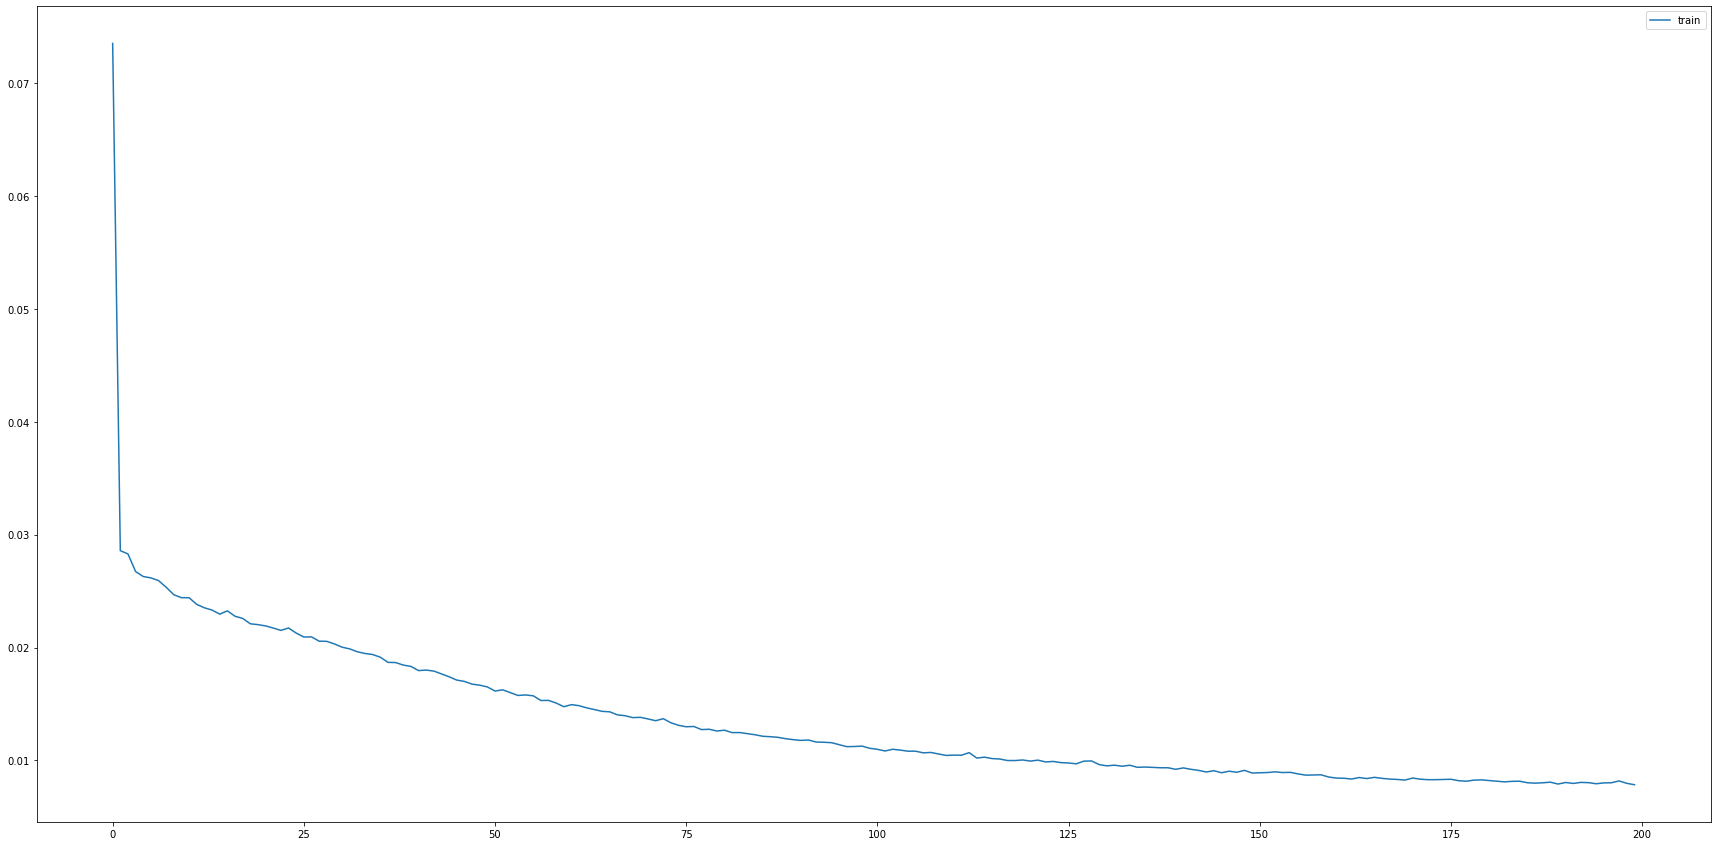

In [394]:
# plot training history
plt.plot(model.history.history['loss'], label='train')
#plt.plot(model.history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [395]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_11988\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_11988\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_11988\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [396]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_11988\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_11988\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_11988\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [397]:
trainPredict.shape

(105, 101)

In [398]:
train_predictions = trainPredict.reshape(len(trainPredict),trainPredict.shape[-1])
test_predictions = testPredict.reshape(len(testPredict),testPredict.shape[-1])

In [399]:
true_predictionsTr = scaler.inverse_transform(train_predictions)
true_predictionsTs = scaler.inverse_transform(test_predictions)

In [400]:
preds = np.concatenate((df.values[:lookback,:],true_predictionsTr, df.values[train_size:train_size+lookback,:], true_predictionsTs), axis=0)

In [401]:
df.shape

(144, 101)

In [402]:
preds.shape

(144, 101)

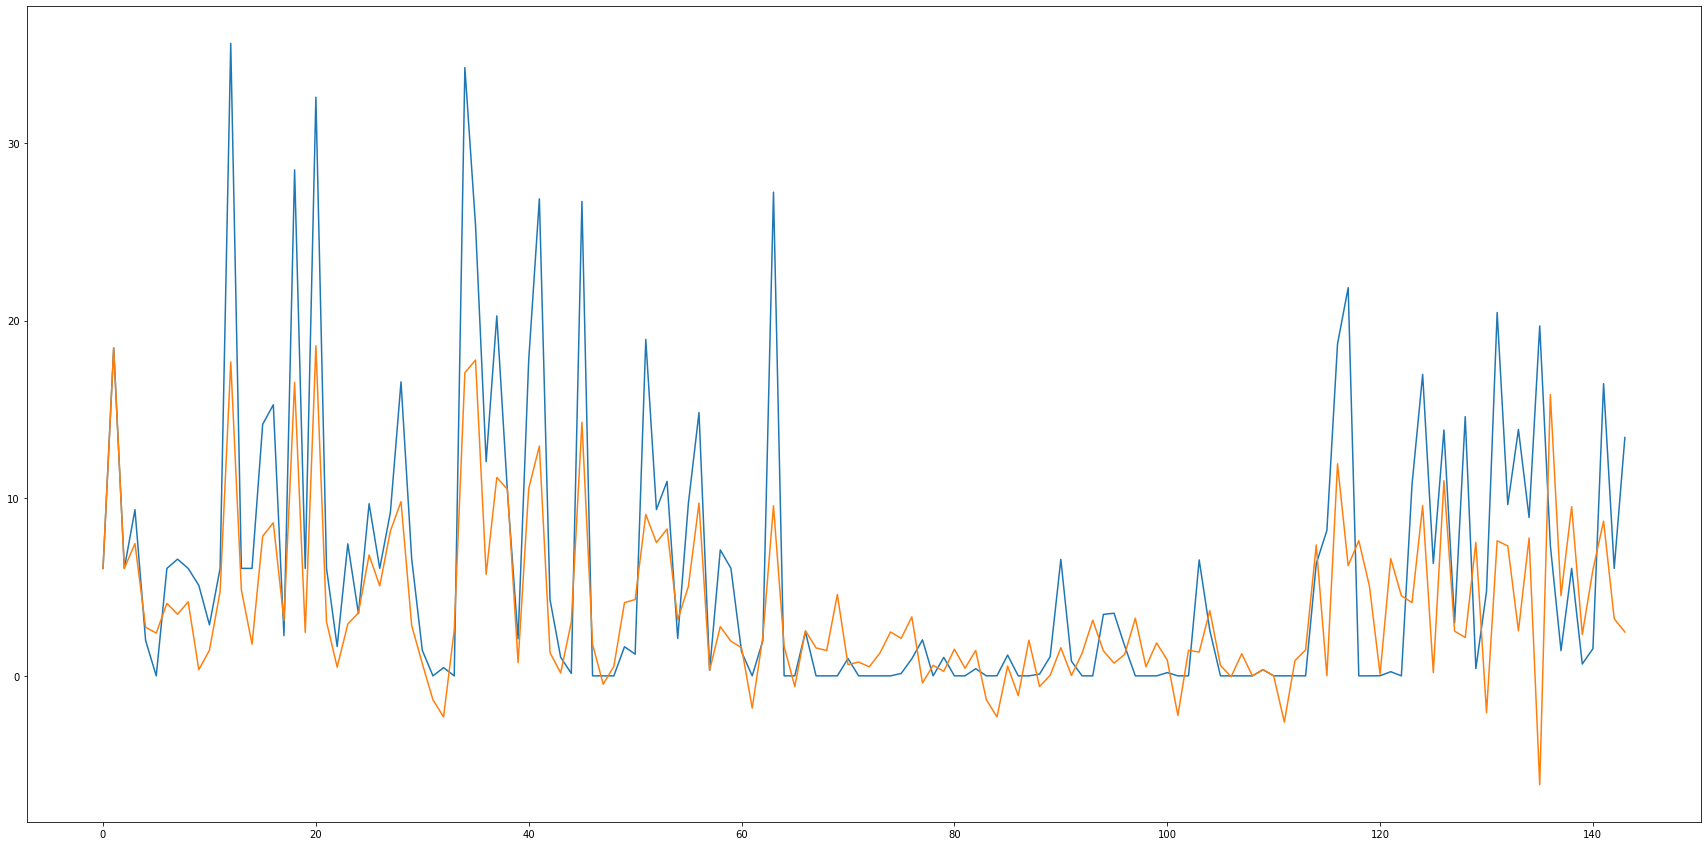

In [408]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(df.values[:,-1])
plt.plot(preds[:,-1])
#plt.legend(['actual data','Predicted data'],loc='best')
plt.show()

In [410]:
model.save("LSTMMultiEdges.h5")

## Prediction on the average city speed -unfinished

In [5]:
df = ds.drop(['coord','gpscoord','lane'],1)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\1701734751.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = ds.drop(['coord','gpscoord','lane'],1)


In [6]:
df = df.resample('3min').mean()
df

,spdK/m,displacement,turnAngle,vehDen
dateandtime,,,,
2023-02-17 00:00:00,58.992090,2237.262857,196.483892,57.916256
2023-02-17 00:03:00,55.791728,1622.110226,205.790827,40.293233
2023-02-17 00:06:00,60.170339,1577.768110,178.990472,42.401575
2023-02-17 00:09:00,60.403732,1698.545423,213.101408,47.422535
2023-02-17 00:12:00,58.263913,1704.683490,201.942685,49.953020
...,...,...,...,...
2023-02-17 23:45:00,59.454828,1832.952150,202.986542,107.523364
2023-02-17 23:48:00,59.053985,1795.112621,213.928220,103.077670
2023-02-17 23:51:00,52.242362,1850.092345,195.741552,97.234483


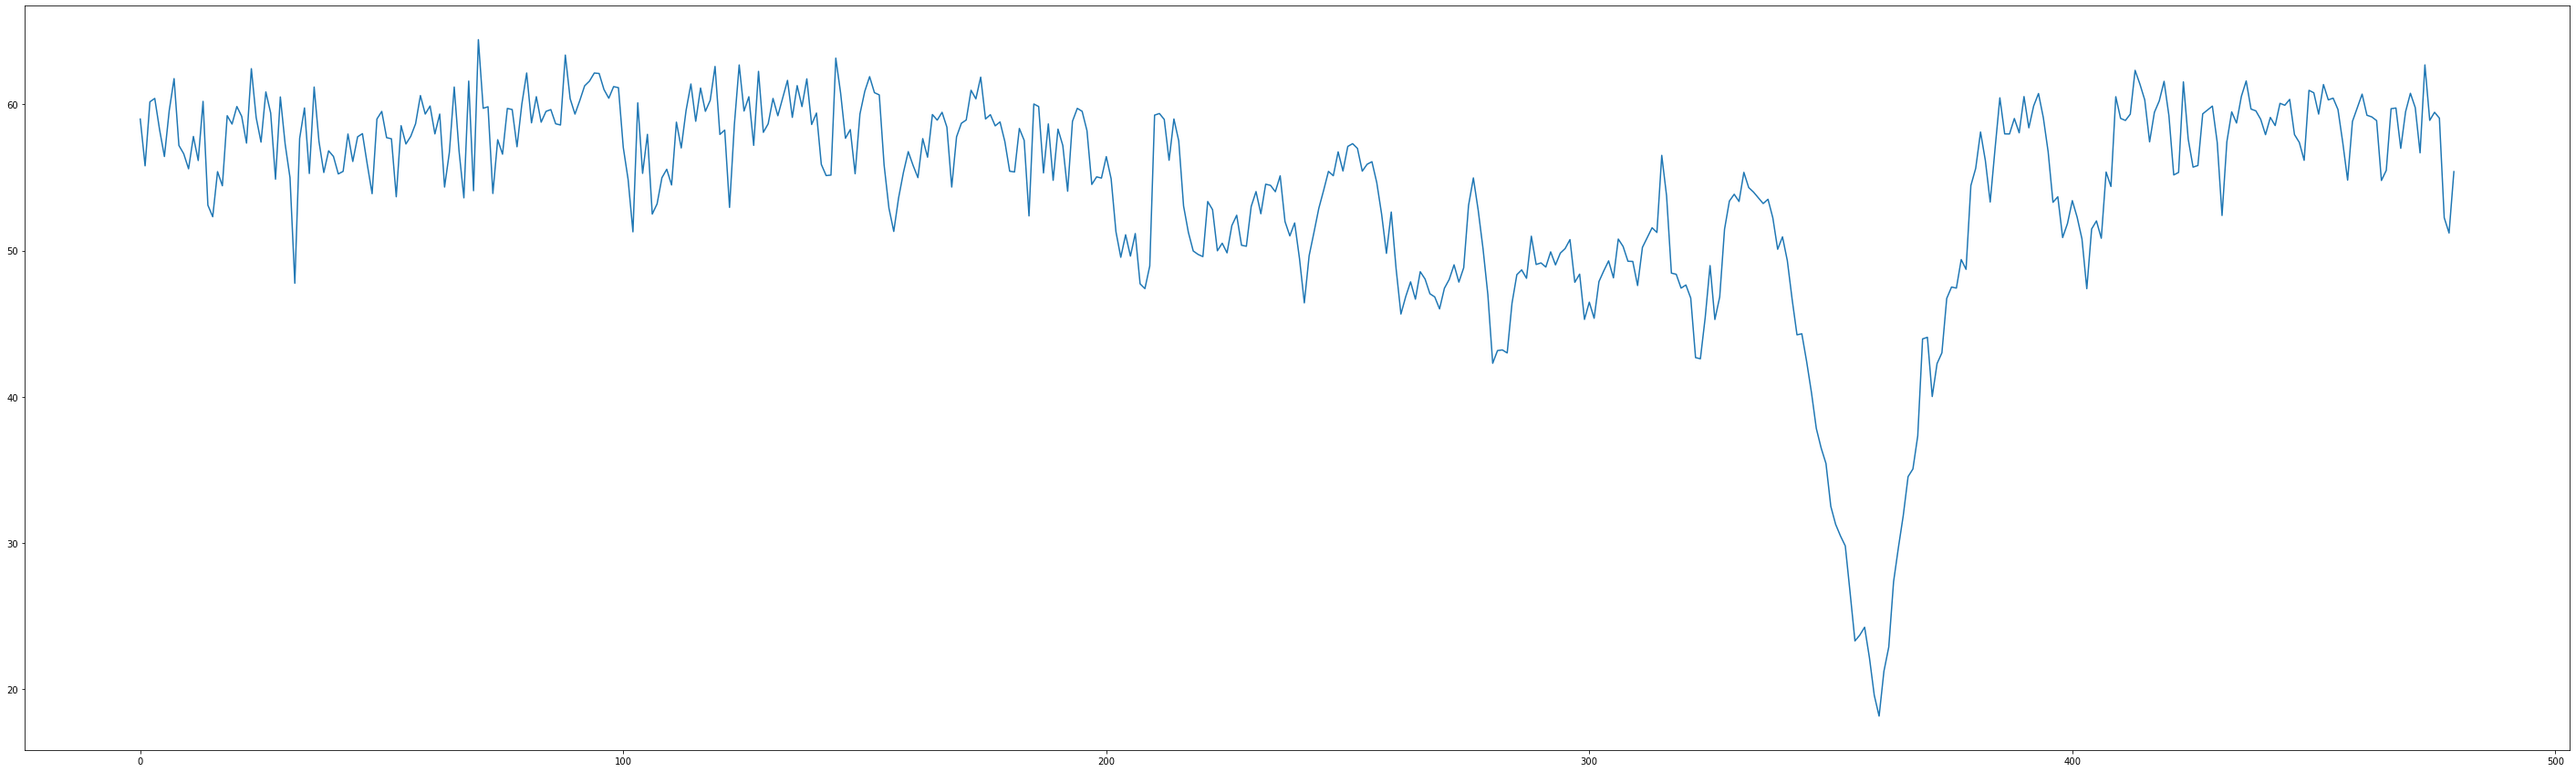

In [7]:
values = df.values
plt.rcParams["figure.figsize"] = (50,15)
plt.plot(values[:, 0])


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train  = df[0:train_size]
test   = df[train_size:]

In [10]:
scaler = MinMaxScaler()

train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])


In [11]:
trainY = train['spdK/m']
testY  = test['spdK/m']

trainX = train.drop(['spdK/m'],1)
testX = test.drop(['spdK/m'],1)
trainX

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainX = train.drop(['spdK/m'],1)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testX = test.drop(['spdK/m'],1)


,displacement,turnAngle,vehDen
dateandtime,,,
2023-02-17 00:00:00,2237.262857,196.483892,57.916256
2023-02-17 00:03:00,1622.110226,205.790827,40.293233
2023-02-17 00:06:00,1577.768110,178.990472,42.401575
2023-02-17 00:09:00,1698.545423,213.101408,47.422535
2023-02-17 00:12:00,1704.683490,201.942685,49.953020
...,...,...,...
2023-02-17 18:57:00,1786.411093,197.825471,421.631829
2023-02-17 19:00:00,2023.805194,197.219635,429.465839
2023-02-17 19:03:00,1967.196782,191.184425,403.011580


In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [13]:
# How many record to take into account
lookback = 5 #15mins
n_features = df.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(trainX, trainY,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(testX, testY,
                                    length=lookback, 
                                    batch_size=batch_size)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
# define model
model = Sequential()
model.add(LSTM(50, return_sequences=False, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(200, return_sequences=True, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(100, return_sequences=False, activation='sigmoid', input_shape=(None, trainX.shape[-1]))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10800     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [95]:
# fit model
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

model.fit(generator,epochs=200, callbacks = es)

Epoch 1/200
379/379 [==============================] - 3s 2ms/step - loss: 7078.7109
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 1227.3009
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 438.4662
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 3576.5002
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 1018.1528
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 737.1349
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 192.8212
Epoch 8/200
379/379 [==============================] - 1s 2ms/step - loss: 456.0615
Epoch 9/200
379/379 [==============================] - 1s 2ms/step - loss: 273.7569
Epoch 10/200
379/379 [==============================] - 1s 2ms/step - loss: 432.7608
Epoch 11/200
379/379 [==============================] - 1s 2ms/step - loss: 198.0078
Epoch 12/200
379/379 [==============================] - 1s 2ms/step - 

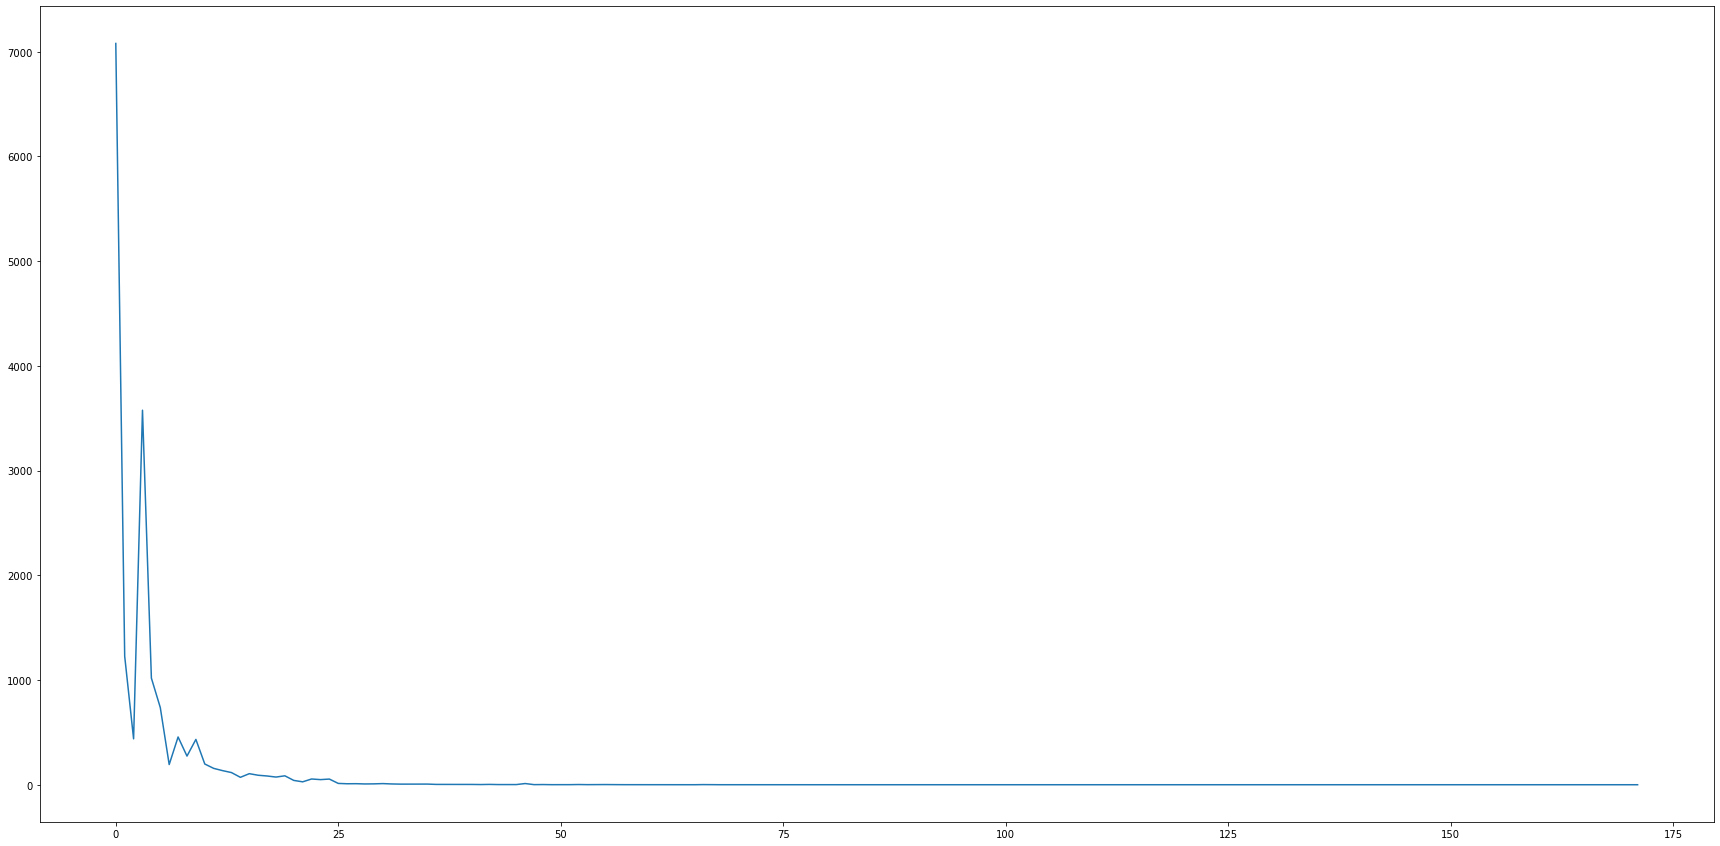

In [96]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [97]:
from tensorflow.keras.models import load_model


In [98]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [99]:
test_predictions = []
for i in range(len(testPredict)):
    
    # get the prediction value for the first batch
    current_pred = testPredict[i,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 


In [100]:
train_predictions = []
for i in range(len(trainPredict)):
    
    # get the prediction value for the first batch
    current_pred = trainPredict[i,0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    


In [101]:
#true_predictionsTr = scaler.inverse_transform(test_predictions)
#true_predictionsTs = scaler.inverse_transform(train_predictions)


In [102]:
preds = np.concatenate((true_predictionsTs, true_predictionsTr), axis=0)


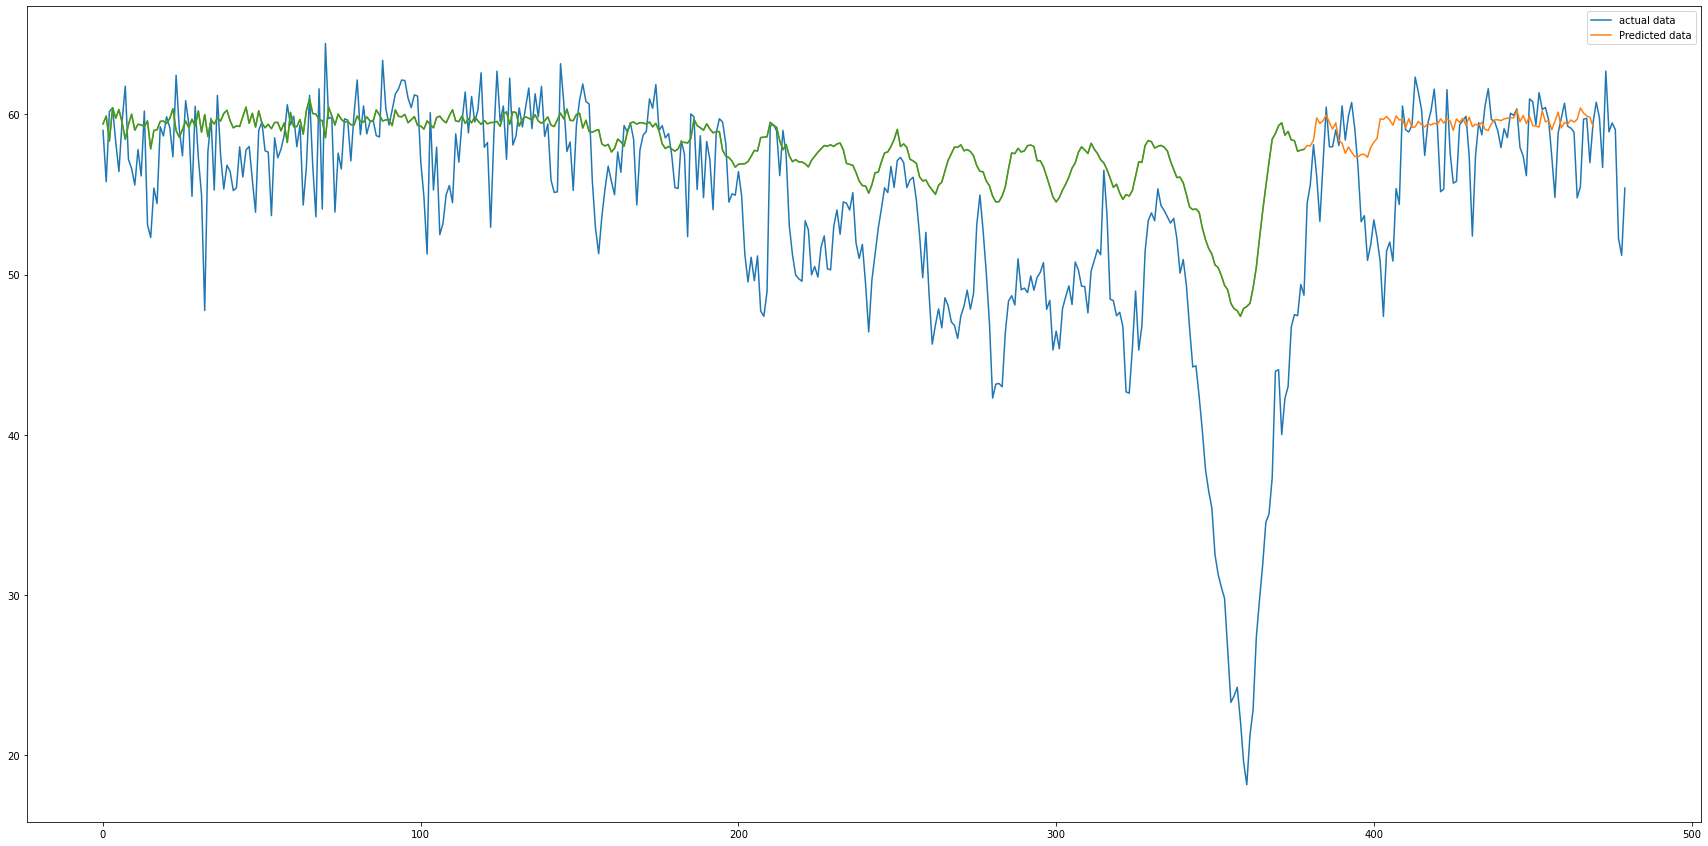

In [92]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(values[:, 0])
plt.plot(preds)
plt.plot(true_predictionsTs)
plt.legend(['actual data','Predicted data'],loc='best')
plt.show()

In [262]:
model.save("steepVanillaLSTM3min.h5")